<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Script-setup" data-toc-modified-id="Script-setup-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Script setup</a></span></li><li><span><a href="#Data-directory-preparention" data-toc-modified-id="Data-directory-preparention-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data directory preparention</a></span></li><li><span><a href="#Data-file-preperation" data-toc-modified-id="Data-file-preperation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data file preperation</a></span><ul class="toc-item"><li><span><a href="#input-directory-(all-general-raw-data-files)" data-toc-modified-id="input-directory-(all-general-raw-data-files)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span><code>input</code> directory (all general raw data files)</a></span></li><li><span><a href="#processed-directory-(all-data-files-produced-in-this-repository)" data-toc-modified-id="processed-directory-(all-data-files-produced-in-this-repository)-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span><code>processed</code> directory (all data files produced in this repository)</a></span></li></ul></li><li><span><a href="#Load-data-functions" data-toc-modified-id="Load-data-functions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Load data functions</a></span></li><li><span><a href="#Load-data-sets" data-toc-modified-id="Load-data-sets-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Load data sets</a></span></li><li><span><a href="#Power-plant-CO2-Signals" data-toc-modified-id="Power-plant-CO2-Signals-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Power plant CO2 Signals</a></span><ul class="toc-item"><li><span><a href="#Plant-Level" data-toc-modified-id="Plant-Level-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Plant Level</a></span></li><li><span><a href="#Technology-Level" data-toc-modified-id="Technology-Level-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Technology Level</a></span></li><li><span><a href="#Country-level" data-toc-modified-id="Country-level-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Country level</a></span></li><li><span><a href="#Signal-analysis" data-toc-modified-id="Signal-analysis-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Signal analysis</a></span></li><li><span><a href="#CO2-Signal-Example" data-toc-modified-id="CO2-Signal-Example-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>CO2 Signal Example</a></span></li></ul></li><li><span><a href="#ENTSO-E-generation-per-technology-CO2-Signal" data-toc-modified-id="ENTSO-E-generation-per-technology-CO2-Signal-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>ENTSO-E generation per technology CO2 Signal</a></span><ul class="toc-item"><li><span><a href="#EF-preparation" data-toc-modified-id="EF-preparation-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>EF preparation</a></span></li><li><span><a href="#Plots" data-toc-modified-id="Plots-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Plots</a></span><ul class="toc-item"><li><span><a href="#CO2-Signal-Example" data-toc-modified-id="CO2-Signal-Example-8.2.1"><span class="toc-item-num">8.2.1&nbsp;&nbsp;</span>CO2 Signal Example</a></span></li><li><span><a href="#CO2-Duration-Curves" data-toc-modified-id="CO2-Duration-Curves-8.2.2"><span class="toc-item-num">8.2.2&nbsp;&nbsp;</span>CO2 Duration Curves</a></span></li><li><span><a href="#Carbon-Intensity-Heat-Map" data-toc-modified-id="Carbon-Intensity-Heat-Map-8.2.3"><span class="toc-item-num">8.2.3&nbsp;&nbsp;</span>Carbon Intensity Heat Map</a></span></li></ul></li></ul></li><li><span><a href="#ENTSO-E-Statistical-Factsheet-2018-in-Comma-Separated-Value-(CSV)-format" data-toc-modified-id="ENTSO-E-Statistical-Factsheet-2018-in-Comma-Separated-Value-(CSV)-format-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>ENTSO-E Statistical Factsheet 2018 in Comma Separated Value (CSV) format</a></span></li><li><span><a href="#ENTSO-E-Power-Stats-generation-per-technology-CO2-Signal" data-toc-modified-id="ENTSO-E-Power-Stats-generation-per-technology-CO2-Signal-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>ENTSO-E Power Stats generation per technology CO2 Signal</a></span></li><li><span><a href="#Compair-Bottom-Up-and-Top-down" data-toc-modified-id="Compair-Bottom-Up-and-Top-down-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Compair Bottom Up and Top down</a></span></li><li><span><a href="#Plotting-CI" data-toc-modified-id="Plotting-CI-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Plotting CI</a></span></li><li><span><a href="#Export-final-CO2-signals" data-toc-modified-id="Export-final-CO2-signals-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Export final CO2 signals</a></span></li></ul></div>

# Introduction

This notebook uses the calculated EFs to design an hourly CO2 emission signal for EU countries.

# Script setup

In [1]:
import os
import logging

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from IPython.display import Image 
import datetime
from matplotlib.lines import Line2D

#GEO
import geopandas as gpd
#from pyproj import CRS
#from pyproj import Transformer
#from shapely.geometry import Point

%matplotlib inline
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [15, 10]
sns.set_theme()

#helpers
from helpers import change_ENTSOE_ProductionTypeName
from helpers import load_timeseries_ENTSOE

# Data directory preparention

Create input, processed and output folders if they don't exist
If the paths are relative, the corresponding folders will be created inside the current working directory.
- input -> all needed input data
- processed -> save point and exchange with other scripts
- output -> final emission factors

In [2]:
input_directory_path = os.path.join('input')
processed_directory_path = 'processed'
output_directory_path = os.path.join('output')

os.makedirs(input_directory_path, exist_ok=True)
os.makedirs(processed_directory_path, exist_ok=True)
os.makedirs(output_directory_path, exist_ok=True)

# Data file preperation

## `input` directory (all general raw data files)

- 1) ENTSO-E production per type
Production per type from ENTSO-E
Original data: ENTSO-E Transparency Platform, Actual Generation per Production Type Available online: 
https://transparency.entsoe.eu/generation/r2/actualGenerationPerProductionType/show
Processed with the following script that converts the data to hourly resolution (private script from INATECH):


 File - > time_series_60min_multiindex.csv - > generation per technology
 
- 2) ENTSO-E production per unit
Production per Unit from ENTSO-E
Original data: ENTSO-E Transparency Platform, Actual Generation per Generation Unit Available online: https://transparency.entsoe.eu/generation/r2/actualGenerationPerGenerationUnit/show (accessed on Apr 29, 2020).
Processed with the following script that converts the data to hourly resolution (private script from INATECH):
https://github.com/INATECH-CIG/entso-e_GenerationOutputPerUnit

File - > gen_data.csv -> hourly generation data per unit

In [3]:
# Checks if the the input directories are empty or not
# Checks all filenames in the input directory

if not os.listdir(input_directory_path) :
    print("The directory for the bootom up method is empty. Please provide the data to the directory as described in the instructions above.")


filenames = [os.path.join(input_directory_path, fn) for fn in os.listdir(input_directory_path)]

print(filenames)

['input\\Bootom_up_methode', 'input\\CO2_Signal', 'input\\ember_EF.csv', 'input\\gen_data_2015.csv', 'input\\gen_data_2016.csv', 'input\\gen_data_2017.csv', 'input\\gen_data_2018.csv', 'input\\Matching', 'input\\MDV_table.csv', 'input\\time_series_60min_multiindex.csv', 'input\\top_down_methode', 'input\\unit_data_2015.csv', 'input\\unit_data_2016.csv', 'input\\unit_data_2017.csv', 'input\\unit_data_2018.csv']


## `processed` directory (all data files produced in this repository)

- 1) EF per type and county

File - > EF_bottom_up_methode.csv

- 2) EF per unit

File -> generation_unit_EF_bottom_up_methode.csv

In [4]:
# Checks if the the input directories are empty or not
# Checks all filenames in the input directory

if not os.listdir(processed_directory_path) :
    print("The directory for the CO2 Signal is empty. Please provide the data to the directory as described in the instructions above.")


filenames = [os.path.join(processed_directory_path, fn) for fn in os.listdir(processed_directory_path)]

print(filenames)

['processed\\CI_bottom_up_methode.csv', 'processed\\CI_top_down_methode.csv', 'processed\\EF_bottom_up_methode.csv', 'processed\\generation_unit_EF_bottom_up_methode.csv', 'processed\\Matching_Entso_EUTL_EU.csv', 'processed\\_CO2_intensity_by_technology.png']


# Load data functions

In [5]:
def load_generation_per_unit(path, fn):
    """
    Load the ENTSO-E gernation per unit data.
        
    Parameters
    ----------
    path: str
        path to data
    fn : str
        filename
        
    """
    
    generation = pd.read_csv(os.path.join(path, fn),sep = ',',index_col=0,parse_dates=True)
    
    return generation

def load_unit_CO2_data(path, fn):
    """
    Own generation unit information with CO2 information per unit
        
    Parameters
    ----------
    path: str
        path to data
    fn : str
        filename
        
    """
    
    df = pd.read_csv(os.path.join(path, fn),sep = ',',index_col=0)
    
    # set name for the index
    #df.index.set_names('eic_g', inplace=True)

    return df

def load_EF(path, fn):
    """
    Own generation EF per tech and country
        
    Parameters
    ----------
    path: str
        path to data
    fn : str
        filename
        
    """
    
    df = pd.read_csv(os.path.join(path, fn),sep = ',',index_col=[0,1])
    
    return df

# Load data sets

#### Load power plant generation data

In [6]:
generation_per_unit = load_generation_per_unit(input_directory_path, 'gen_data_2018.csv')

#### Load power plant emission info data

In [7]:
generation_unit_info = load_unit_CO2_data(processed_directory_path, 'generation_unit_EF_bottom_up_methode.csv')

#### Load ENTSO-E generation per type

In [8]:
entsoe_gen_type = load_timeseries_ENTSOE(input_directory_path, 'time_series_60min_multiindex.csv')

#### Load EF per technology

In [9]:
EF = load_EF(processed_directory_path, 'EF_bottom_up_methode.csv')

In [10]:
EF.head(10)

EF Verified_EF
MapCode ProductionTypeName                  
AT      gas                 0.36        True
        hard_coal           1.07        True
BE      gas                 0.39        True
CZ      hard_coal           1.01        True
        lignite             0.93        True
DE      gas                 0.43        True
        hard_coal           0.91        True
        lignite             1.14        True
        other_fossil        1.40        True
DK      gas                 0.46       False

#### Filter generation set to generation info data

In [11]:
generation_per_unit = generation_per_unit[generation_unit_info.index]

# Power plant CO2 Signals

In this section we build CO2 signal out of the used per power plant generation data. We limit the used generation to the generation units where we where able to calculated EFs.

In [12]:
generation_per_unit = generation_per_unit[generation_unit_info.index]

In [13]:
generation_per_unit.head(5)

,14WENERGIEAGWT4S,45W000000000032T,45W000000000033R,45W000000000034P,45W000000000040U,45W000000000035N,45W000000000099Y,45W000000000038H,14W-GEN-DO3----F,14W-WML-M1-----G,...,26WUULA-CASELL2N,26WUULA-CASELL4J,26WUULA-CASELL1P,26WUULA-CASELL3L,48W00000EGGPS-1X,48W00000EGGPS-4R,48W00000EGGPS-3T,48W00000EGGPS-2V,48W000000SUTB-1P,48W000000DEEP-1N
2018-01-01 00:00:00,0.0,20.53,0.0,0.42,0.0,48.83,0.0,118.23,0.0,150.65,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 01:00:00,0.0,19.81,0.0,0.39,0.0,48.96,0.0,103.25,0.0,149.28,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 02:00:00,0.0,19.63,0.0,0.42,0.0,49.03,0.0,102.62,0.0,149.05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 03:00:00,0.0,22.39,0.0,0.40,0.0,48.93,0.0,103.04,0.0,148.85,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 04:00:00,0.0,23.08,0.0,0.42,0.0,49.05,0.0,80.15,0.0,149.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
generation_unit_info.head(5)

,MapCode,EUTL_countrycode,ProductionTypeName,AreaCode,AreaName,AreaTypeCode,InstalledGenCapacity,PowerSystemResourceName,duplicate_count,generation_2018,...,VERIFIED_EMISSIONS_2009,ALLOCATION_2008,VERIFIED_EMISSIONS_2008,ACCOUNT_CLOSURE,side_generation_2018,PP_emissions_2018,PP_EF2018,EF_2018_validation,Tech_EF,Country_EF
eic_g,,,,,,,,,,,,,,,,,,,,,
14WENERGIEAGWT4S,AT,AT,gas,10YAT-APG------L,APG CA,CTA,400.0,Kraftwerk Timelkam GUD,2.0,685235.67,...,340026,218704,103553,OPEN,685235.67,2.672040e+05,0.389945,True,0.360910,0.427776
45W000000000032T,DK,DK,hard_coal,10Y1001A1001A796,Energinet CA,CTA,147.0,Asnaesvaerket 2,1.0,219309.91,...,2430356,1765318,2484733,OPEN,770018.30,2.501768e+05,1.140746,True,0.959711,0.934412
45W000000000033R,DK,DK,hard_coal,10Y1001A1001A796,Energinet CA,CTA,640.0,Asnaesvaerket 5,1.0,550708.39,...,2430356,1765318,2484733,OPEN,770018.30,6.282182e+05,1.140746,True,0.959711,0.934412
45W000000000034P,DK,DK,hard_coal,10Y1001A1001A796,Energinet CA,CTA,250.0,Amagervaerket 3,1.0,1060165.23,...,1684995,1250995,1089604,OPEN,1060165.23,1.038454e+06,0.979521,True,0.959711,0.934412
45W000000000040U,DK,DK,hard_coal,10Y1001A1001A796,Energinet CA,CTA,377.0,Esbjergvaerket 3,1.0,1193633.83,...,1318927,1051489,1158930,OPEN,1193633.83,1.066679e+06,0.893640,True,0.959711,0.934412


## Plant Level

In [15]:
CO2_emission_per_unit_EF = generation_per_unit.multiply((generation_unit_info.PP_EF2018), axis='columns')

In [16]:
CO2_emission_per_unit_EF.dropna(axis=1, inplace=True)

In [17]:
CO2_emission_per_unit_EF.sum(axis=1).describe()

count      8760.000000
mean      62454.893328
std       14436.974738
min           0.000000
25%       51993.841567
50%       62073.329628
75%       72049.809056
max      103855.609255
dtype: float64

## Technology Level

In [18]:
CO2_emission_per_tech_EF = generation_per_unit.multiply((generation_unit_info.Tech_EF), axis='columns')

In [19]:
CO2_emission_per_tech_EF.dropna(axis=1, inplace=True)

In [20]:
CO2_emission_per_tech_EF.sum(axis=1).describe()

count      8760.000000
mean      62454.893328
std       14522.561053
min           0.000000
25%       51983.451989
50%       62122.937205
75%       72060.397950
max      103874.373497
dtype: float64

## Country level

In [21]:
CO2_emission_per_country_EF = generation_per_unit.multiply((generation_unit_info.Country_EF), axis='columns')

In [22]:
CO2_emission_per_country_EF.dropna(axis=1, inplace=True)

In [23]:
CO2_emission_per_country_EF.sum(axis=1).describe()

count      8760.000000
mean      62454.893328
std       15657.842613
min           0.000000
25%       50687.041429
50%       61782.617702
75%       73049.248305
max      105483.463129
dtype: float64

## Signal analysis 

#### Scatter Plot

In [117]:
Carbon_intensitiy = pd.DataFrame()
Carbon_intensitiy['unit_EF'] = ((CO2_emission_per_unit_EF * 1000000).sum(axis=1) / (generation_per_unit * 1000).sum(axis=1))
Carbon_intensitiy['tech_EF'] = ((CO2_emission_per_tech_EF * 1000000).sum(axis=1) / (generation_per_unit * 1000).sum(axis=1))
Carbon_intensitiy['country_EF'] = ((CO2_emission_per_country_EF * 1000000).sum(axis=1) / (generation_per_unit * 1000).sum(axis=1))
Carbon_intensitiy['diff_norm'] = (Carbon_intensitiy['unit_EF'] - Carbon_intensitiy['tech_EF']) / Carbon_intensitiy['tech_EF']

In [108]:
diff_norm = (Carbon_intensitiy['unit_EF'] - Carbon_intensitiy['country_EF']) / Carbon_intensitiy['country_EF']

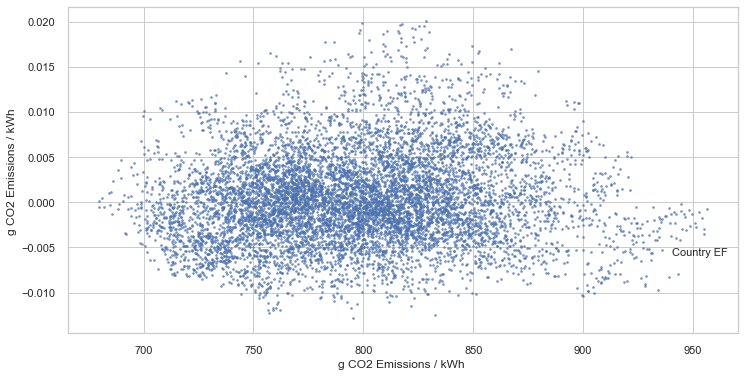

In [118]:
diff_norm

fig,ax = plt.subplots(1,1)
    
fig.set_size_inches(12,6)


Carbon_intensitiy.plot(kind='scatter', x="tech_EF", y="diff_norm", ax=ax, alpha=0.6, color='b', s=3)

#Carbon_intensitiy.plot(kind='scatter', x="unit_EF", y="tech_EF", ax=ax, alpha=0.6, color='r', s=3)

#Carbon_intensitiy.plot(kind='scatter', x="unit_EF", y="unit_EF", ax=ax, alpha=0.6, color='g', s=3)



ax.set_ylabel("g CO2 Emissions / kWh ")
ax.set_xlabel("g CO2 Emissions / kWh ")

ax.legend(['Country EF', 'Technology EF', 'Powerplant EF'] ,loc='lower right', bbox_to_anchor=(1.0, 0.2))

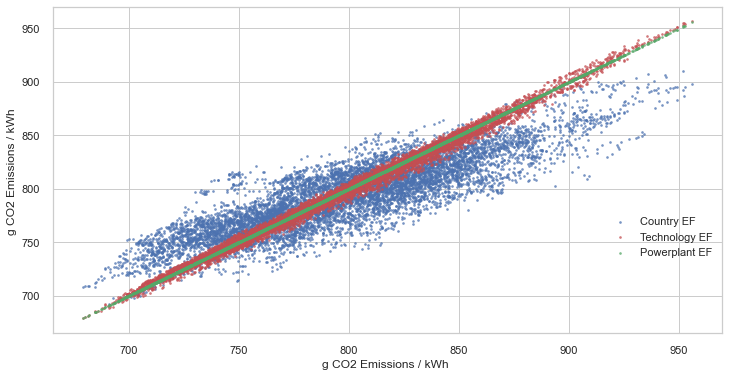

In [114]:
fig,ax = plt.subplots(1,1)
    
fig.set_size_inches(12,6)


Carbon_intensitiy.plot(kind='scatter', x="unit_EF", y="country_EF", ax=ax, alpha=0.6, color='b', s=3)

Carbon_intensitiy.plot(kind='scatter', x="unit_EF", y="tech_EF", ax=ax, alpha=0.6, color='r', s=3)

Carbon_intensitiy.plot(kind='scatter', x="unit_EF", y="unit_EF", ax=ax, alpha=0.6, color='g', s=3)



ax.set_ylabel("g CO2 Emissions / kWh ")
ax.set_xlabel("g CO2 Emissions / kWh ")

ax.legend(['Country EF', 'Technology EF', 'Powerplant EF'] ,loc='lower right', bbox_to_anchor=(1.0, 0.2))

2018-01-01 00:00:00    0.012812
2018-01-01 01:00:00    0.013408
2018-01-01 02:00:00    0.012512
2018-01-01 03:00:00    0.012046
2018-01-01 04:00:00    0.011484
                         ...   
2018-12-31 19:00:00   -0.008018
2018-12-31 20:00:00   -0.007187
2018-12-31 21:00:00   -0.007311
2018-12-31 22:00:00   -0.006719
2018-12-31 23:00:00   -0.006011
Length: 8760, dtype: float64

In [26]:
Carbon_intensitiy_per_country_unit_EF = ((CO2_emission_per_unit_EF * 1000000).groupby(generation_unit_info.MapCode, axis=1).sum()) / (generation_per_unit * 1000).groupby(generation_unit_info.MapCode, axis=1).sum()
Carbon_intensitiy_per_country_tech_EF = (CO2_emission_per_tech_EF * 1000000).groupby(generation_unit_info.MapCode, axis=1).sum() / (generation_per_unit * 1000).groupby(generation_unit_info.MapCode, axis=1).sum()
Carbon_intensitiy_per_country_country_EF = (CO2_emission_per_country_EF * 1000000).groupby(generation_unit_info.MapCode, axis=1).sum() / (generation_per_unit * 1000).groupby(generation_unit_info.MapCode, axis=1).sum()

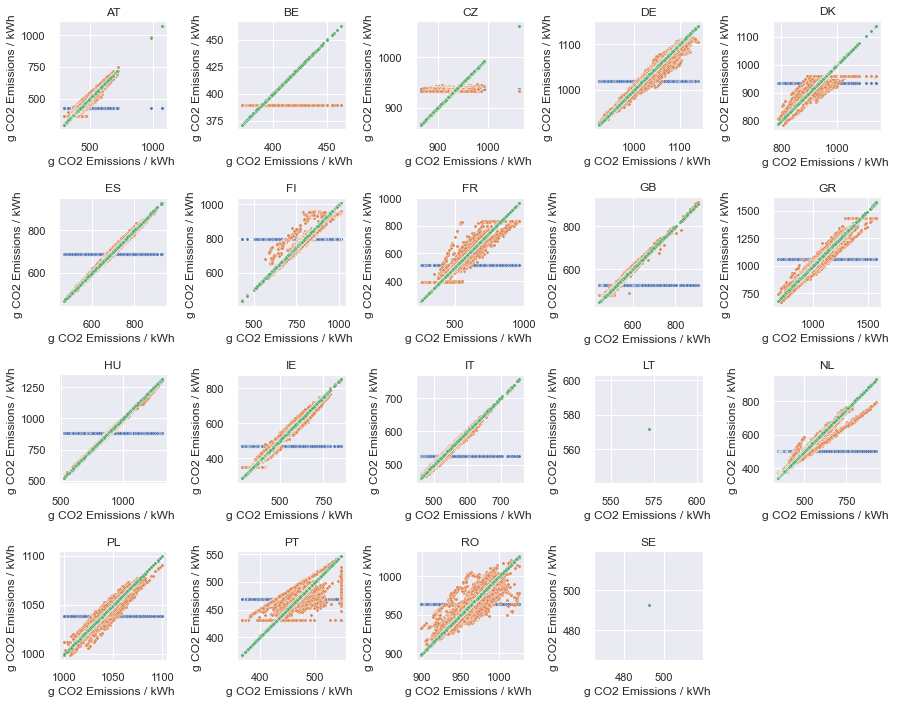

In [27]:
n_graphs = len(Carbon_intensitiy_per_country_unit_EF.columns)
n_cols = 5
    
if n_graphs % n_cols == 0:
    n_rows = n_graphs // n_cols
else:
    n_rows = n_graphs // n_cols + 1
    
    
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)

fig.delaxes(axes[3][4])

size = 2.5

fig.set_size_inches(size*n_cols,size*n_rows)
    
    
for i, country in enumerate(Carbon_intensitiy_per_country_unit_EF.columns):
    i_row = i // n_cols
    i_col = i % n_cols
        
    ax = axes[i_row,i_col]
    
    ax.set(aspect='equal')
    
    sns.scatterplot(x=Carbon_intensitiy_per_country_unit_EF.loc[:,country], y=Carbon_intensitiy_per_country_country_EF.loc[:,country], s=10, ax=ax)
    sns.scatterplot(x=Carbon_intensitiy_per_country_unit_EF.loc[:,country], y=Carbon_intensitiy_per_country_tech_EF.loc[:,country], s=10, ax=ax)
    sns.scatterplot(x=Carbon_intensitiy_per_country_unit_EF.loc[:,country], y=Carbon_intensitiy_per_country_unit_EF.loc[:,country], s=10, ax=ax)
    
        #max_lim = (max(entso_DE.loc[:,tech].max(),generation_DE.loc[:,tech].max())//1000)*1000+1000
        #if max_lim < 0:
        #    max_lim = 0
        
        #min_lim = (min(entso_DE.loc[:,tech].min(),generation_DE.loc[:,tech].min())//1000)*1000-1000
        #if min_lim < 0:
        #    min_lim = 0
    
    ax.set_title(country)
        #ax.set_xlim(min_lim,max_lim)
        #ax.set_ylim(min_lim,max_lim)
        
    ax.set_xlabel("g CO2 Emissions / kWh ")
    ax.set_ylabel("g CO2 Emissions / kWh ")
    
    fig.tight_layout()
    
ax.legend(['Country EF', 'Technology EF', 'Powerplant EF'] ,loc='lower right', bbox_to_anchor=(2.8, 0.5))

#### EF distribution

Text(0.5, 0, 'Country')

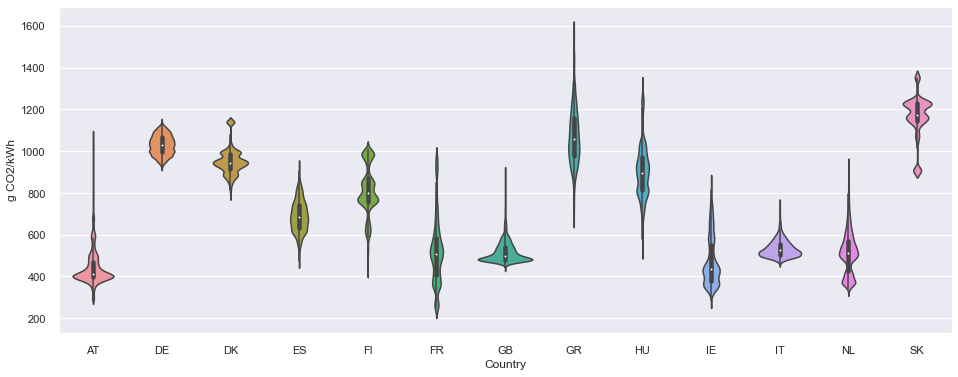

In [28]:
# per unit EF
fig,ax = plt.subplots(1,1)
    
fig.set_size_inches(16,6)
ax = sns.violinplot(data=Carbon_intensitiy_per_country_unit_EF[['AT', 'DE', 'DK', 'ES', 'FI', 'FR', 'GB', 'GR', 'HU', 'IE',
       'IT', 'NL', 'SK']])#,'BE']])

ax.set_ylabel("g CO2/kWh")
ax.set_xlabel("Country")

Text(0.5, 0, 'Country')

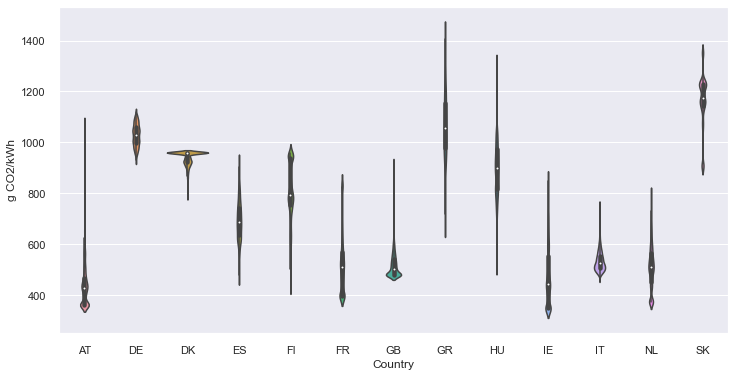

In [29]:
# per tech ef
fig,ax = plt.subplots(1,1)
    
fig.set_size_inches(12,6)

ax = sns.violinplot(data=Carbon_intensitiy_per_country_tech_EF[['AT', 'DE', 'DK', 'ES', 'FI', 'FR', 'GB', 'GR', 'HU', 'IE',
       'IT', 'NL', 'SK']])#,'BE']])

ax.set_ylabel("g CO2/kWh")
ax.set_xlabel("Country")

Text(0.5, 0, 'Country')

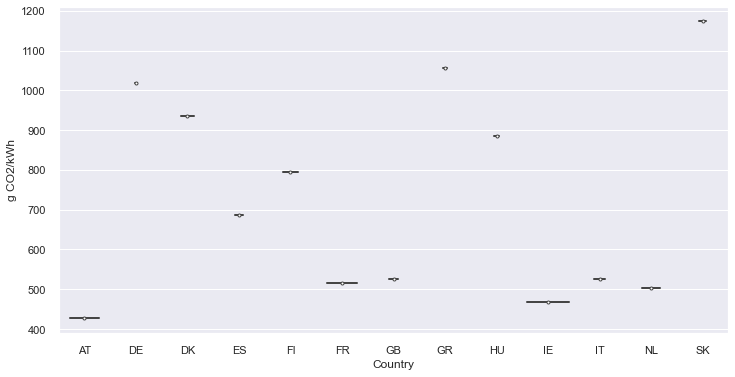

In [30]:
# per country EF
fig,ax = plt.subplots(1,1)
    
fig.set_size_inches(12,6)

ax = sns.violinplot(data=Carbon_intensitiy_per_country_country_EF[['AT', 'DE', 'DK', 'ES', 'FI', 'FR', 'GB', 'GR', 'HU', 'IE',
       'IT', 'NL', 'SK']])#,'BE']])

ax.set_ylabel("g CO2/kWh")
ax.set_xlabel("Country")

## CO2 Signal Example

The following plot shows an example of the three generated CO2 Signals

In [31]:
def plot_production_profile(generation, CO2_emission_per_unit_EF, CO2_emission_per_tech_EF, CO2_emission_per_country_EF, generators, countries, start, end):
    
    # load and filter data
    generators = generators[generators.MapCode == countries]
    generation = generation[generators.index]
    CO2_emission_per_unit_EF = CO2_emission_per_unit_EF[generators.index]
    CO2_emission_per_tech_EF = CO2_emission_per_tech_EF[generators.index]
    CO2_emission_per_country_EF = CO2_emission_per_country_EF[generators.index]
    
    # sum technologies
    generation_car =  generation.groupby(generators.ProductionTypeName, axis=1).sum()
    
    # sum Emissions
    CO2_emission_per_unit_EF = CO2_emission_per_unit_EF.sum(axis=1)
    CO2_emission_per_tech_EF = CO2_emission_per_tech_EF.sum(axis=1)
    CO2_emission_per_country_EF = CO2_emission_per_country_EF.sum(axis=1)
    
    # Carbon intensity
    Carbon_intensitiy_unit_EF = (CO2_emission_per_unit_EF * 1000000) / ((generation_car * 1000).sum(axis=1))
    Carbon_intensitiy_tech_EF = (CO2_emission_per_tech_EF * 1000000) / ((generation_car * 1000).sum(axis=1))
    Carbon_intensitiy_country_EF = (CO2_emission_per_country_EF * 1000000) / ((generation_car * 1000).sum(axis=1))
    
    #plotting
    import seaborn as sns

    sns.set(style="whitegrid")

    colors = {'gas': '#b20101',
              'biomass': '#0c6013',
              'hard_coal': '#707070',
              'geothermal': '#ba91b1',
              'lignite': '#9e5a01',
              'nuclear': '#ff9000',
              'oil': '#262626',
              'other_fossil': '#d35050',
              'waste': '#68896b',
              'onwind': '#235ebc',
              'offwind': '#6895dd',
              'solar': '#f9d002',
              'PHS': '#08ad97',
              'hydro': '#08ad97',
              'ror': '#4adbc8',
              'load': '#ea048a'}

    generation_car = generation_car.loc[start:end]
    Carbon_intensitiy_unit_EF = Carbon_intensitiy_unit_EF.loc[start:end]
    Carbon_intensitiy_tech_EF = Carbon_intensitiy_tech_EF.loc[start:end]
    Carbon_intensitiy_country_EF = Carbon_intensitiy_country_EF.loc[start:end]


    #order of col
    #cols = ['lignite', 'hard_coal',  'gas']#, 'other_fossil']

    #p_by_carrier = p_by_carrier[cols]



    fig,ax = plt.subplots(1,1)

    fig.set_size_inches(12,6)

    generation_car.plot(kind="area",
                        ax=ax,
                        linewidth=0,
                        color=[colors[col] for col in generation_car.columns],
                        alpha=0.7)



    ax.set_ylabel("Production [MW]")
    ax.set_xlabel("Date")
    ax.legend(loc='upper right', bbox_to_anchor=(1.0, 0.5))

    #ax3 = ax.twinx()
    Carbon_intensitiy_unit_EF.plot(ax=ax, secondary_y=True, legend=False)


    Carbon_intensitiy_tech_EF.plot(ax=ax, secondary_y=True, legend=False)

    Carbon_intensitiy_country_EF.plot(ax=ax, secondary_y=True, legend=False)

    ax.right_ax.set_ylabel("Emission intensity [g CO2 / kWh]")

    #ax.set_xlim(0,snapLength-1)
    #ax.set_ylim(0,150000)
    #ax.right_ax.set_ylim(0,0.1)
    plt.tight_layout()
    
    return

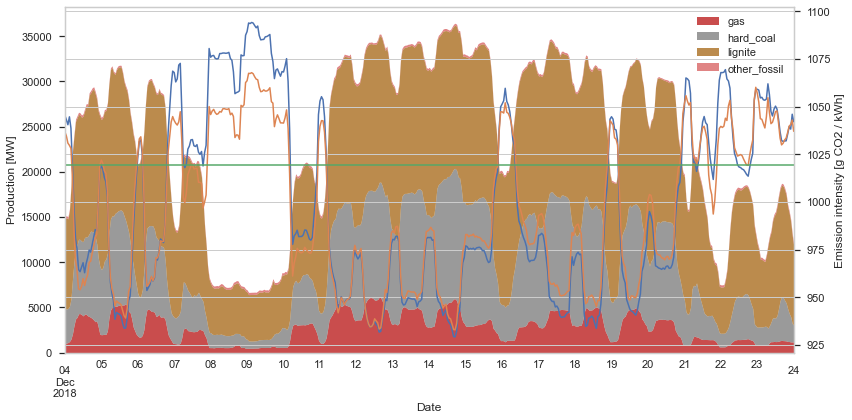

In [32]:
start = datetime.date(2018, 12, 4)
end = datetime.date(2018, 12, 24)

#Carbon_intensitiy_per_country_unit_EF
#Carbon_intensitiy_per_country_tech_EF
#Carbon_intensitiy_per_country_country_EF

plot_production_profile(generation_per_unit, CO2_emission_per_unit_EF, CO2_emission_per_tech_EF, CO2_emission_per_country_EF, generation_unit_info, 'DE', start, end)


# ENTSO-E generation per technology CO2 Signal

In this section we using the country specific EF for generating an CO2 emission signal for all EU countries. The production data are based on the production per type data from ENTSO-E

In [33]:
# take a look at the generation data
entsoe_gen_type.head(5)

region                         AT                                     \
variable                  biomass   gas geothermal hard_coal   hydro   
utc_timestamp                                                          
2018-01-01 00:00:00+00:00   316.0  71.0        0.0     150.0   751.0   
2018-01-01 01:00:00+00:00   316.0  70.0        0.0     149.0  1538.0   
2018-01-01 02:00:00+00:00   316.0  69.0        0.0     149.0    62.0   
2018-01-01 03:00:00+00:00   316.0  72.0        0.0     149.0  1548.0   
2018-01-01 04:00:00+00:00   316.0  75.0        0.0     149.0    40.0   

region                                                                BE  ...  \
variable                  other_fossil solar  waste wind_onshore biomass  ...   
utc_timestamp                                                             ...   
2018-01-01 00:00:00+00:00         22.0   0.0  100.0        832.0  232.46  ...   
2018-01-01 01:00:00+00:00         22.0   0.0  100.0        926.0  153.58  ...   
2018-01-01 02:00:00+00:00         22.0   0.0  100.0        692.0  133.70  ...   
2018-01-01 03:00:00+00:00         22.0   0.0  100.0        453.0  131.38  ...   
2018-01-01 04:00:00+00:00         22.0   0.0  100.0        321.0  131.26  ...   

region                         SK                                             \
variable                  biomass    gas hard_coal     hydro lignite nuclear   
utc_timestamp                                                                  
2018-01-01 00:00:00+00:00    28.2  175.6      48.1  455.9300   179.5  1819.3   
2018-01-01 01:00:00+00:00    28.1  172.9      48.0  499.8967   177.9  1816.7   
2018-01-01 02:00:00+00:00    28.1  162.1      46.7  543.8633   174.7  1808.7   
2018-01-01 03:00:00+00:00    29.7  140.3      45.3  587.8300   168.5  1803.6   
2018-01-01 04:00:00+00:00    29.5  143.5      46.4  552.4800   170.6  1809.1   

region                                                              
variable                    oil other_fossil other_renewable solar  
utc_timestamp                                                       
2018-01-01 00:00:00+00:00  42.3        436.5            41.4   0.0  
2018-01-01 01:00:00+00:00  42.0        433.8            41.0   0.0  
2018-01-01 02:00:00+00:00  43.8        425.7            40.8   0.0  
2018-01-01 03:00:00+00:00  40.2        415.4            39.4   0.0  
2018-01-01 04:00:00+00:00  40.2        421.3            40.4   0.0  

[5 rows x 424 columns]

In [98]:
entsoe_gen_type['IT'].sum()/1000

variable
biomass          3490.1275
gas             74489.4485
geothermal       5700.3445
hard_coal       25835.9655
hydro            9832.6690
oil               974.4370
other_fossil    38210.5035
solar           17793.9230
waste             331.5515
wind_onshore    17314.4145
dtype: float64

## EF preparation 

In [36]:
EF

EF Verified_EF
MapCode ProductionTypeName                  
AT      gas                 0.36        True
        hard_coal           1.07        True
BE      gas                 0.39        True
CZ      hard_coal           1.01        True
        lignite             0.93        True
DE      gas                 0.43        True
        hard_coal           0.91        True
        lignite             1.14        True
        other_fossil        1.40        True
DK      gas                 0.46       False
        hard_coal           0.96        True
ES      gas                 0.39        True
        hard_coal           0.98        True
FI      gas                 0.43        True
        hard_coal           0.96        True
        other_fossil        0.86        True
FR      gas                 0.40        True
        hard_coal           0.83        True
GB      gas                 0.48        True
        hard_coal           1.10        True
GR      gas                 0.37        True
        lignite             1.43        True
HU      gas                 0.39        True
        lignite             1.36        True
IE      gas                 0.35        True
        hard_coal           1.03        True
IT      gas                 0.40        True
        hard_coal           1.00        True
        other_fossil        0.52       False
LT      gas                 0.57       False
NL      gas                 0.37        True
        hard_coal           0.98        True
PL      gas                 0.51       False
        hard_coal           0.95        True
        lignite             1.16        True
PT      gas                 0.43        True
        hard_coal           0.55       False
RO      gas                 0.58       False
        hard_coal           1.23        True
        lignite             1.01        True
SE      gas                 0.49         NaN
SK      hard_coal           0.91        True
        lignite             1.35        True

In [37]:
# Mean EF for all calculated countries and technologies

EF_mean = EF.groupby('ProductionTypeName').mean()
EF_mean.loc['other_fossil'] = 0.5
EF_mean = EF_mean.EF.to_dict()


print(EF_mean)

{'gas': 0.43333333333333335, 'hard_coal': 0.9646666666666667, 'lignite': 1.1971428571428573, 'other_fossil': 0.5}


In [38]:
# If no country-specific EFs are available and also no mean EF is available for a country and technology, we use the following EFs. Source:

EF_default = {'biomass':0,
            'geothermal':0,
            'hydro':0,
            'nuclear':0,
            'oil':0.8,
            'other_renewable':0,
            'solar':0,
            'waste':0.2,
            'wind_offshore':0,
            'wind_onshore':0,
            'marine':0,
            'oil shale':0.51,
            'other_fossil': 0.51}


In [39]:
# Create a dataframe with the EF for each country and technology. If no specific EF is available, we use the default EF .
EF_multi = {}

for i in entsoe_gen_type.columns:
    if i in EF:
        EF_multi[i] = EF[i]
    elif i[1] in EF_mean:
        EF_multi[i] = EF_mean[i[1]]
    else:
        EF_multi[i] = EF_default[i[1]]

In [40]:
# calculate emissions based on EF and generation per type
CO2_emission_entsoe_gen_type = entsoe_gen_type * EF_multi

In [41]:
# From the previously calculated emissions, an emission signal (g CO2 / kWh) can now be calculated for each country.
# Since emissions and generation are available per technology, they must first be grouped and summed. 

# Emission in g CO2
CO2_emission = (CO2_emission_entsoe_gen_type * 1000000).groupby(level=0, axis=1).sum()
# generation in kWh
Generation = (entsoe_gen_type * 1000).groupby(level=0, axis=1).sum()

# CI in g CO2/kWh
Carbon_intensitiy_entsoe_gen_type = CO2_emission.div(Generation)

In [42]:
Carbon_intensitiy_entsoe_gen_type.head(5)

region,AT,BE,BG,CH,CY,CZ,DE,DE_50hertz,DE_LU,DE_amprion,...,PT,RO,RS,SE,SE_1,SE_2,SE_3,SE_4,SI,SK
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00+00:00,92.090395,102.110454,502.865727,0.0,756.659142,495.322132,198.465492,286.380183,NaN,347.760206,...,167.578661,493.229477,835.277573,34.852300,0.0,0.0,0.0,0.0,304.235125,182.678029
2018-01-01 01:00:00+00:00,65.706077,106.947939,502.735186,0.0,747.445255,492.007311,196.543412,286.455335,NaN,346.578521,...,171.885601,476.555020,861.455664,35.190435,0.0,0.0,0.0,0.0,291.618343,179.339214
2018-01-01 02:00:00+00:00,145.131442,111.560259,503.831454,0.0,702.784810,488.497067,191.791931,286.497918,NaN,343.905706,...,183.234704,419.347808,868.744589,32.835821,0.0,0.0,0.0,0.0,300.404293,174.784101
2018-01-01 03:00:00+00:00,77.419298,110.683183,502.578158,0.0,701.790281,489.514260,192.218197,282.951729,NaN,347.558195,...,168.192452,498.946729,847.487113,32.924770,0.0,0.0,0.0,0.0,300.209377,166.983557
2018-01-01 04:00:00+00:00,202.576083,110.766173,506.888638,0.0,741.514360,497.943122,190.131996,280.837424,NaN,344.440413,...,156.989502,500.678799,865.962448,32.596582,0.0,0.0,0.0,0.0,264.006857,170.275040


In [43]:
mean_Carbon_intensitiy_entsoe_gen_type = CO2_emission.sum() / Generation.sum()

In [44]:
Carbon_intensitiy_entsoe_gen_type_mean = Carbon_intensitiy_entsoe_gen_type.copy()


In [45]:
for i in Carbon_intensitiy_entsoe_gen_type_mean.columns:
    Carbon_intensitiy_entsoe_gen_type_mean[i] = mean_Carbon_intensitiy_entsoe_gen_type[i]

In [46]:
Carbon_intensitiy_entsoe_gen_type_mean.head()

region,AT,BE,BG,CH,CY,CZ,DE,DE_50hertz,DE_LU,DE_amprion,...,PT,RO,RS,SE,SE_1,SE_2,SE_3,SE_4,SI,SK
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00+00:00,160.69131,182.650431,584.080937,0.0,763.336099,583.353791,465.408141,645.807575,455.582833,643.382895,...,372.751035,426.064309,1018.904328,27.319588,0.0,0.0,0.0,0.0,403.119923,196.812779
2018-01-01 01:00:00+00:00,160.69131,182.650431,584.080937,0.0,763.336099,583.353791,465.408141,645.807575,455.582833,643.382895,...,372.751035,426.064309,1018.904328,27.319588,0.0,0.0,0.0,0.0,403.119923,196.812779
2018-01-01 02:00:00+00:00,160.69131,182.650431,584.080937,0.0,763.336099,583.353791,465.408141,645.807575,455.582833,643.382895,...,372.751035,426.064309,1018.904328,27.319588,0.0,0.0,0.0,0.0,403.119923,196.812779
2018-01-01 03:00:00+00:00,160.69131,182.650431,584.080937,0.0,763.336099,583.353791,465.408141,645.807575,455.582833,643.382895,...,372.751035,426.064309,1018.904328,27.319588,0.0,0.0,0.0,0.0,403.119923,196.812779
2018-01-01 04:00:00+00:00,160.69131,182.650431,584.080937,0.0,763.336099,583.353791,465.408141,645.807575,455.582833,643.382895,...,372.751035,426.064309,1018.904328,27.319588,0.0,0.0,0.0,0.0,403.119923,196.812779


## Plots

This section is to see some plots for the generated data

### CO2 Signal Example

In [47]:
entsoe_gen_type.columns.levels[1]


Index(['Unnamed: 1_level_1', 'biomass', 'gas', 'geothermal', 'hard_coal',
       'hydro', 'lignite', 'nuclear', 'oil', 'other_fossil', 'other_renewable',
       'solar', 'waste', 'wind_offshore', 'wind_onshore'],
      dtype='object', name='variable')

In [48]:
def plot_production_profile_2(generation, Carbon_intensitiy, mean_Carbon_intensitiy, countries, start, end):
    
    # load and filter data
    generation = generation[countries]
    Carbon_intensitiy = Carbon_intensitiy[countries]
    Carbon_intensitiy_mean = mean_Carbon_intensitiy[countries]
    
    
    #plotting
    import seaborn as sns

    sns.set(style="whitegrid")

    colors = {'gas': '#b20101',
              'biomass': '#0c6013',
              'hard_coal': '#707070',
              'geothermal': '#ba91b1',
              'lignite': '#9e5a01',
              'nuclear': '#ff9000',
              'oil': '#262626',
              'other_fossil': '#d35050',
              'waste': '#68896b',
              'wind_onshore': '#235ebc',
              'wind_offshore': '#6895dd',
              'solar': '#f9d002',
              'PHS': '#08ad97',
              'hydro': '#08ad97',
              'ror': '#4adbc8',
              'load': '#ea048a',
              'other_renewable':'#08ad97'}

    generation = generation.loc[start:end]
    Carbon_intensitiy = Carbon_intensitiy.loc[start:end]
    Carbon_intensitiy_mean = Carbon_intensitiy_mean.loc[start:end]



    #order of col
    tech = ['biomass', 'nuclear','lignite', 'hard_coal','geothermal', 'hydro', 'gas','waste', 'oil', 'other_fossil', 'other_renewable', 'solar',  'wind_offshore', 'wind_onshore']
    
    filter = generation.columns
    
    cols = [k for k in tech if k in filter]

    generation = generation[cols]



    fig,ax = plt.subplots(1,1)

    fig.set_size_inches(16,6)

    generation.plot(kind="area",
                        ax=ax,
                        linewidth=0,
                        color=[colors[col] for col in generation.columns],
                        alpha=0.7)



    ax.set_ylabel("Production [MW]", fontsize=14)
    ax.set_xlabel("Date", fontsize=14)
    #ax.legend(loc='center left', bbox_to_anchor=(1.08, 0.5))
    ax.grid(False)
    
    ax2 = fig.add_axes() # This is the magic that joins the x-axis
    ax2 = ax.twinx()

    #ax3 = ax.twinx()
    
    Carbon_intensitiy.plot(ax=ax2, secondary_y=True, legend=False, color="k")
    Carbon_intensitiy_mean.plot(ax=ax2, secondary_y=True, legend=False, color="k", linestyle='--')    
    
        
    handles = [Line2D([0], [0], color='k', lw=2),
               Line2D([0], [0], color='k', linestyle='--', lw=2)
               ]
    
    labels = [str(countries)+ ' technology specific',str(countries) + ' country specific']
    
    l2 = ax2.legend(handles, labels,  loc='upper left', bbox_to_anchor=(1.10, 0.90),
                   handletextpad=0., columnspacing=0.5, ncol=1,
                   title='CO2 Signals', fontsize=14, frameon=True)
    
    handles = []
    labels = []
    
    for t in generation.columns:
        handles.append(plt.Line2D([0], [0], color=colors[t], marker='o', markersize=8, linewidth=0))
        labels.append(t)
        
    l3 = ax.legend(handles, labels,  bbox_to_anchor=(1.10, 0.7),
                   handletextpad=0., columnspacing=0.5, ncol=2,
                   title='Technology Types', fontsize=14, frameon=True, framealpha=0.6) #loc="upper right", 
    
    


    ax2.right_ax.set_ylabel("Emission intensity [g CO2 / kWh]", fontsize=14)

    plt.tight_layout()
    plt.show()
    
    return fig

C:\Users\Freddy\.conda\envs\Lecture\lib\site-packages\ipykernel_launcher.py:66: MatplotlibDeprecationWarning: Calling add_axes() without argument is deprecated since 3.3 and will be removed two minor releases later. You may want to use add_subplot() instead.


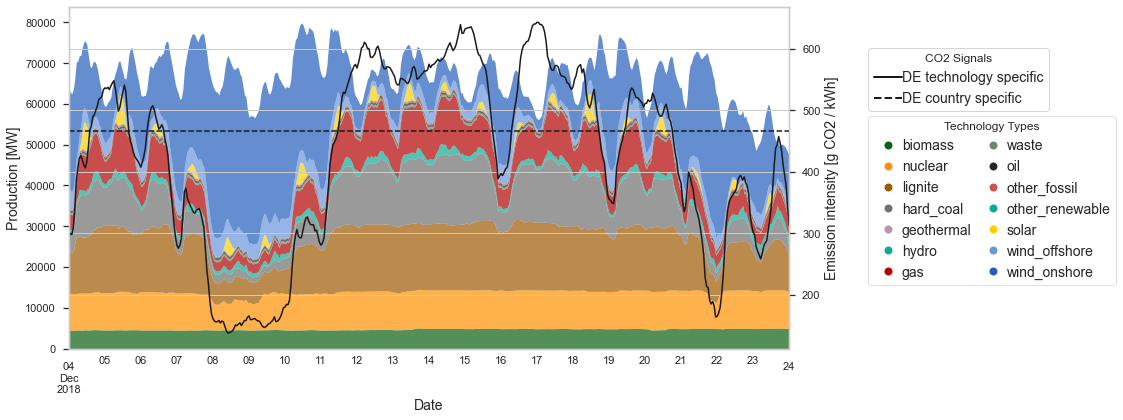

In [49]:
start = datetime.date(2018, 12, 4)
end = datetime.date(2018, 12, 24)

fig = plot_production_profile_2(entsoe_gen_type, Carbon_intensitiy_entsoe_gen_type, Carbon_intensitiy_entsoe_gen_type_mean, 'DE', start, end)

In [50]:
fig.savefig(os.path.join(output_directory_path + '/CO2_signal_example_DE.png'))

C:\Users\Freddy\.conda\envs\Lecture\lib\site-packages\ipykernel_launcher.py:66: MatplotlibDeprecationWarning: Calling add_axes() without argument is deprecated since 3.3 and will be removed two minor releases later. You may want to use add_subplot() instead.


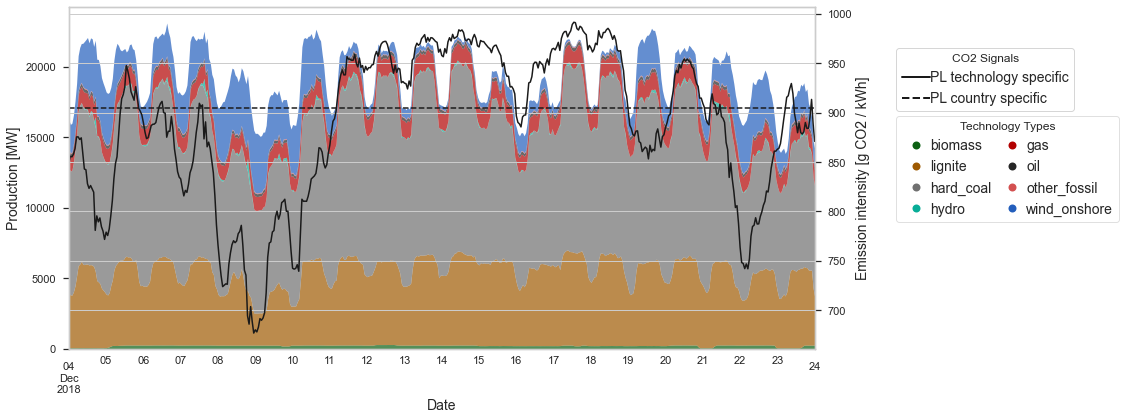

In [51]:
start = datetime.date(2018, 12, 4)
end = datetime.date(2018, 12, 24)

fig = plot_production_profile_2(entsoe_gen_type, Carbon_intensitiy_entsoe_gen_type, Carbon_intensitiy_entsoe_gen_type_mean, 'PL', start, end)

In [52]:
fig.savefig(os.path.join(output_directory_path + '/CO2_signal_example_PL.png'))

C:\Users\Freddy\.conda\envs\Lecture\lib\site-packages\ipykernel_launcher.py:66: MatplotlibDeprecationWarning: Calling add_axes() without argument is deprecated since 3.3 and will be removed two minor releases later. You may want to use add_subplot() instead.


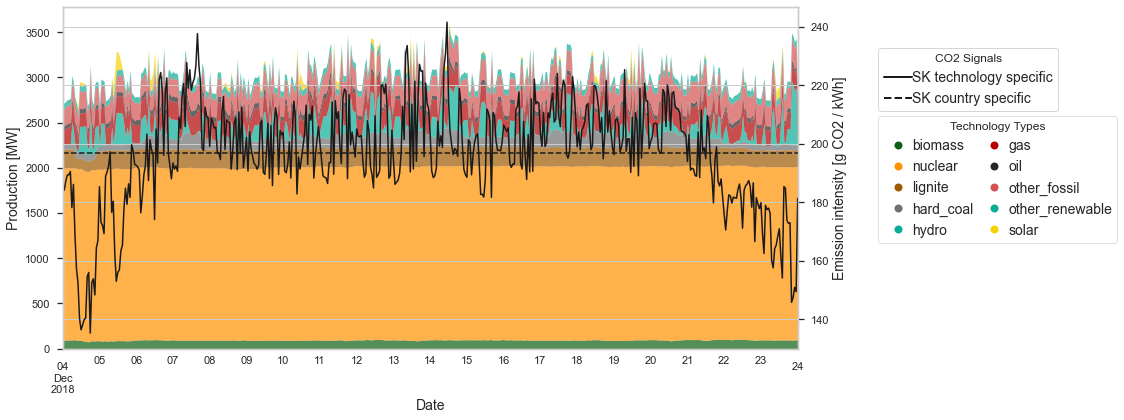

In [53]:
start = datetime.date(2018, 12, 4)
end = datetime.date(2018, 12, 24)

fig = plot_production_profile_2(entsoe_gen_type, Carbon_intensitiy_entsoe_gen_type, Carbon_intensitiy_entsoe_gen_type_mean, 'SK', start, end)

### CO2 Duration Curves

In [54]:
countries = Carbon_intensitiy_entsoe_gen_type[EF.index.levels[0]].columns

#### One Figure

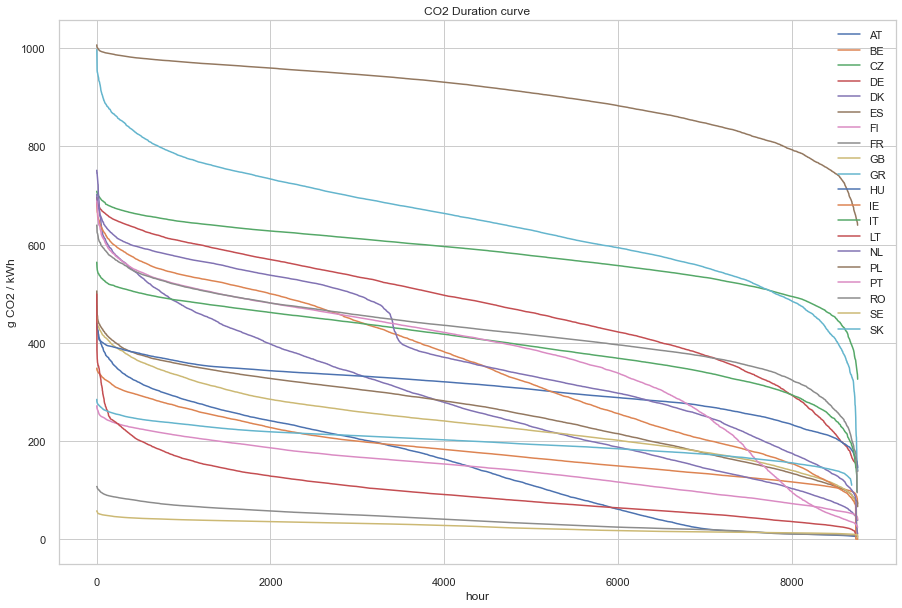

In [55]:
fig, ax = plt.subplots()

for i in countries:    
    ax.plot(range(0,8760), Carbon_intensitiy_entsoe_gen_type[i].sort_values(ascending=False), label = 'CO2 Duration curve')


    
ax.legend(countries ,loc='upper right')
ax.set_xlabel('hour')
ax.set_ylabel('g CO2 / kWh')
plt.title('CO2 Duration curve')
plt.show()

#### Multi sub Figures

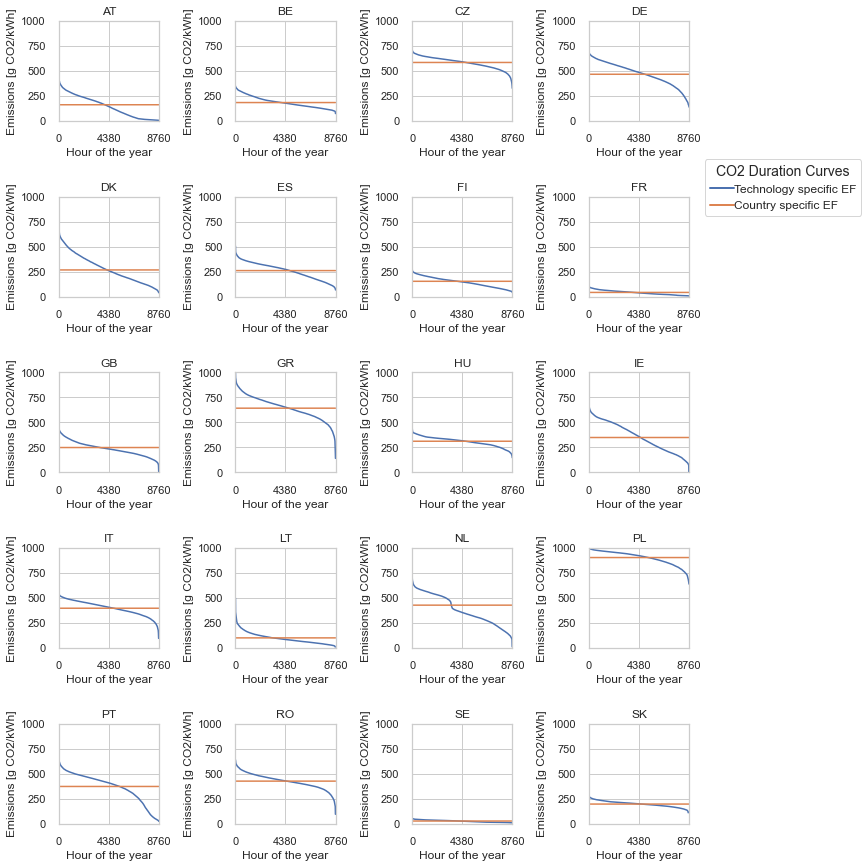

In [56]:
n_graphs = len(Carbon_intensitiy_entsoe_gen_type[EF.index.levels[0]].columns)
n_cols = 4
    
if n_graphs % n_cols == 0:
    n_rows = n_graphs // n_cols
else:
    n_rows = n_graphs // n_cols + 1
    
    
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)

#fig.delaxes(axes[3][4])

size = 2.5

fig.set_size_inches(size*n_cols,size*n_rows)
    
    
for i, country in enumerate(Carbon_intensitiy_entsoe_gen_type[EF.index.levels[0]].columns):
    i_row = i // n_cols
    i_col = i % n_cols
        
    ax = axes[i_row,i_col]
        
    ax.plot(range(0,8760), Carbon_intensitiy_entsoe_gen_type[country].sort_values(ascending=False))
    ax.plot(range(0,8760), ([mean_Carbon_intensitiy_entsoe_gen_type[country]]*8760))
    
    ax.set_title(country, fontsize=12)
    ax.set_xlim(0,8760)
    ax.set_ylim(0,1000)
    
    ax.set_xticks([0,4380,8760])
        
    ax.set_xlabel("Hour of the year", fontsize=12)
    ax.set_ylabel("Emissions [g CO2/kWh]", fontsize=12)
    ax.set_aspect(8.760)
    fig.tight_layout()

handles = [Line2D([0], [0], color='C0', lw=2),
           Line2D([0], [0], color='C1', lw=2)
           ]
    
labels = ['Technology specific EF','Country specific EF']
    
l2 = ax.legend(handles, labels,  loc='upper left', bbox_to_anchor=(1.10, 6.70),
                   handletextpad=0., columnspacing=0.5, ncol=1,
                   title='CO2 Duration Curves', fontsize=12, title_fontsize= 14, frameon=True)



In [57]:
fig.savefig(os.path.join(output_directory_path + '/CO2_duration_curve.png'),bbox_extra_artists=(l2,), bbox_inches='tight')

### Carbon Intensity Heat Map 

<AxesSubplot:xlabel='utc_timestamp', ylabel='region'>

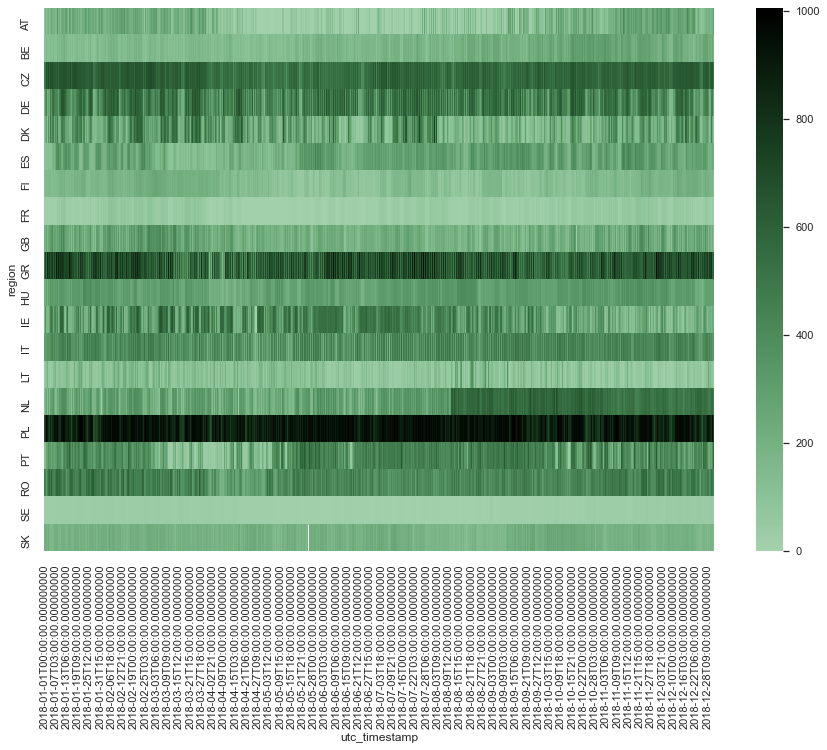

In [58]:
# all countries
sns.heatmap(Carbon_intensitiy_entsoe_gen_type[countries].transpose(), cmap=sns.cubehelix_palette(start=2, rot=0, dark=0, light=.75, reverse=False, as_cmap=True))

In [59]:
# use Germany as an aingle country example
df = Carbon_intensitiy_entsoe_gen_type['DE'].to_frame().copy()

In [60]:
df.head()

,DE
utc_timestamp,
2018-01-01 00:00:00+00:00,198.465492
2018-01-01 01:00:00+00:00,196.543412
2018-01-01 02:00:00+00:00,191.791931
2018-01-01 03:00:00+00:00,192.218197
2018-01-01 04:00:00+00:00,190.131996


In [61]:
# def names for the heat map
df['month'] = df.index.month_name()
df['day'] = df.index.day_name()
df['hour']=df.index.hour
df['date']=df.index.date
df.head()

,DE,month,day,hour,date
utc_timestamp,,,,,
2018-01-01 00:00:00+00:00,198.465492,January,Monday,0,2018-01-01
2018-01-01 01:00:00+00:00,196.543412,January,Monday,1,2018-01-01
2018-01-01 02:00:00+00:00,191.791931,January,Monday,2,2018-01-01
2018-01-01 03:00:00+00:00,192.218197,January,Monday,3,2018-01-01
2018-01-01 04:00:00+00:00,190.131996,January,Monday,4,2018-01-01


In [62]:
# group the values
df1 = df.groupby(['month', 'hour'],sort=False).agg(['mean'])
df1.columns=df1.columns.droplevel(0)
df1.reset_index(inplace=True)
df1.head()

,month,hour,mean
0,January,0,394.793053
1,January,1,391.456795
2,January,2,388.776336
3,January,3,392.178734
4,January,4,406.080661


In [63]:
# pandas pivot with multiple variables
heatmap_data = pd.pivot_table(df1, values='mean', index=['month'], columns='hour')
# print to see few rows and columns
print(heatmap_data.iloc[0:3, 0:3])

hour               0           1           2
month                                       
April     462.078321  458.051680  460.470506
August    524.098936  524.162009  528.648398
December  374.043998  372.526765  372.672800


In [64]:
months=df1.month.unique().tolist()
print(months)

['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


In [65]:
heatmap_data=heatmap_data.loc[months]

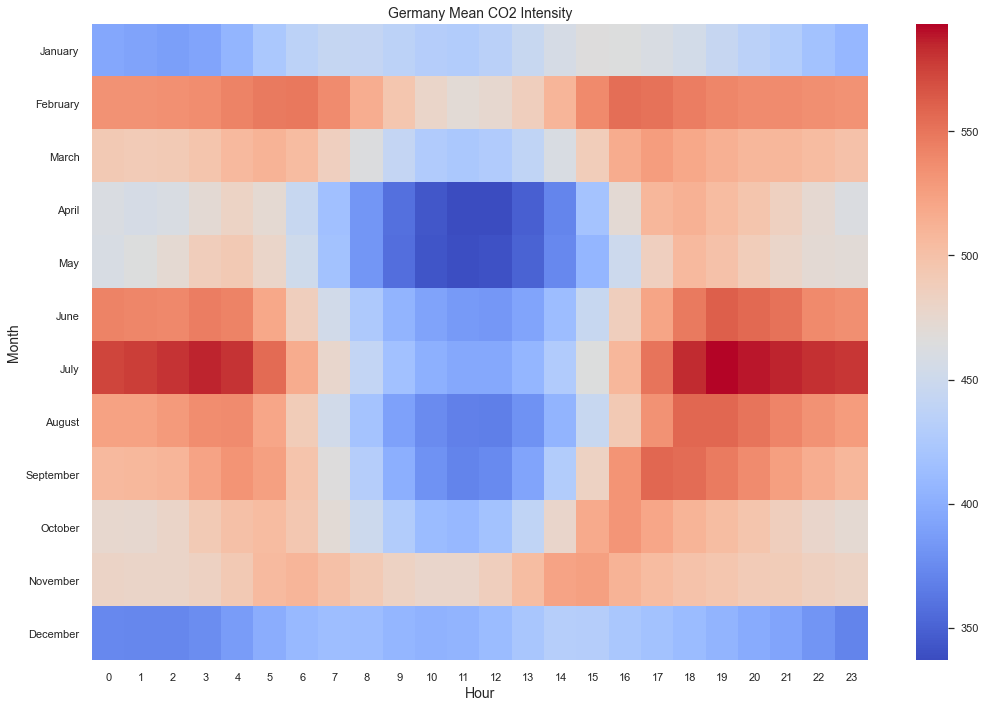

In [66]:
sns.heatmap(heatmap_data,cmap="coolwarm")
plt.xlabel("Hour", size=14)
plt.ylabel("Month", size=14)
plt.title("Germany Mean CO2 Intensity", size=14)
plt.tight_layout()

# ENTSO-E Statistical Factsheet 2018 in Comma Separated Value (CSV) format

In [254]:
def change_ENTSOE_FACT_ProductionTypeName(ProductionTypeName):
    """
    Converts ENTSO-E Factsheet ProductionTypeNames into INATECH technology type names.

    Parameters
    ----------
    ProductionTypeName : string
        DESCRIPTION.

    Returns
    -------
    string
        DESCRIPTION.

    """
    return ProductionTypeName.replace({
            'Other Fossil fuel': "other",
            'Fossil Hard coal': 'hard_coal', 
            'Fossil Brown coal / Lignite': 'lignite', 
            'Fossil Gas': 'gas',
            'Fossil Coal-derived gas': 'other_fossil',
            'Fossil Peat': 'other_fossil',
            'Nuclear': 'nuclear',
            'Biomass': 'biomass',
            'Biogas': 'biomass',
            'Waste': 'waste',
            'Waste ( non renewable part )': 'waste',
            'Geothermal': 'other_renewable',
            'Marine': 'other_renewable',
            'Hydro Marine ( tidal / wave )': 'other_renewable',
            'Other': 'other_fossil',
            'Hydro Pure storage':'hydro',
            'Other fossil fuels': 'other_fossil',
            'Hydro pure pumped storage':'hydro',
            'Hydro Pumped Storage': 'hydro',
            'Hydro Run-of-river and poundage': 'hydro',
            'Hydro Run-of-river and pondage': 'hydro',
            'Hydro Water Reservoir': 'hydro',
            'Hydro mixed pumped storage ( non renewable part )': 'hydro',
            'Hydro mixed pumped storage ( renewable part )': 'hydro',
            'Fossil Oil': 'other_fossil',
            'Fossil Oil shale': 'other_fossil',
            'Other non-renewable': 'other_fossil',
            'Mixed fuels': 'other_fossil',
            'Solar': 'solar',
            'Wind Onshore': 'wind_onshore',
            'Wind Offshore': 'wind_offshore',
            'Wind onshore': 'wind_onshore',
            'Wind offshore': 'wind_offshore',
            'Other renewable': 'other_renewable',
            'Other non-renewables': "other_fossil",
            'Solar PV': 'solar',
            'Solar thermal': 'solar',
            'Solar Thermal': 'solar',
            'Waste (renewable part)': 'waste',
            'Renewable Waste': 'waste'}, inplace = False)

In [255]:
FACT = pd.read_csv(input_directory_path + '/entsoe-statistical-factsheet-2018-stacked.csv', index_col=[1], header=[0], parse_dates=True)

FACT.drop(['capacity_MW'], axis=1, inplace=True)

# set filter and apply filter to datat
filter = ['Fossil fuels','Total NGC','Renewable net generation','Non renewable net generation','Not identified']
    
FACT.query('source not in @filter', inplace=True)

FACT.source.replace({'Of which ':''}, regex=True, inplace=True)

# change ProductionTypeNames into INATECH technology type names
FACT.source = change_ENTSOE_FACT_ProductionTypeName(FACT.source)

In [256]:
# reset index for groupby function
FACT.reset_index(inplace=True)
# group same production types
FACT = FACT.groupby(['source', 'year','country']).sum()
# set the old index for the dataframe
FACT = FACT.reset_index().set_index('year')

In [257]:
# convert to MWh
FACT['generation_TWh'] = FACT['generation_TWh'] * 1000000

In [258]:
FACT.rename(columns={'generation_TWh':'generation'}, inplace=True)

In [259]:
FACT

,source,country,generation
year,,,
2018-01-01,biomass,AL,0.0
2018-01-01,biomass,AT,0.0
2018-01-01,biomass,BA,0.0
2018-01-01,biomass,BE,3500000.0
2018-01-01,biomass,BG,300000.0
...,...,...,...
2018-01-01,wind_onshore,RS,100000.0
2018-01-01,wind_onshore,SE,16600000.0
2018-01-01,wind_onshore,SI,0.0


In [260]:
FACT =  pd.pivot_table(FACT, values='generation', index=FACT.index, columns=['country','source'])

In [261]:
# Create a dataframe with the EF for each country and technology. If no specific EF is available, we use the default EF .
EF_multi = {}

for i in FACT.columns:
    if i in EF:
        EF_multi[i] = EF[i]
    elif i[1] in EF_mean:
        EF_multi[i] = EF_mean[i[1]]
    else:
        EF_multi[i] = EF_default[i[1]]

In [262]:
# calculate emissions based on EF and generation per type
CO2_emission_FACT = FACT * EF_multi

In [263]:
# From the previously calculated emissions, an emission signal (g CO2 / kWh) can now be calculated for each country.
# Since emissions and generation are available per technology, they must first be grouped and summed. 
CO2_emission_FACT = (CO2_emission_FACT * 1000000).groupby(level=0, axis=1).sum()
Generation_FACT = (FACT * 1000).groupby(level=0, axis=1).sum()

Carbon_intensitiy_FACT = CO2_emission_FACT.div(Generation_FACT)

In [264]:


mean_Carbon_intensitiy_FACT = CO2_emission_FACT.loc['2018'].sum() / Generation_FACT.loc['2018'].sum()

In [265]:
mean_Carbon_intensitiy_FACT

country
AL      0.000000
AT    123.712588
BA    756.090226
BE    162.090559
BG    497.366275
CH     14.419753
CY    480.000000
CZ    571.954593
DE    459.185169
DK    273.087356
EE    431.372549
ES    275.338916
FI    138.502473
FR     38.646980
GB    254.030102
GR    529.810367
HR    171.685950
HU    277.637557
IE    331.716553
IS      0.000000
IT    317.002259
LT    100.000000
LU     50.793651
LV    211.794872
ME    465.555556
MK    679.926740
NL    433.639939
NO      9.589673
PL    849.415711
PT    309.742754
RO    350.810387
RS    851.676287
SE     12.846608
SI    329.238095
SK    156.555429
TR    527.551265
dtype: float64

# ENTSO-E Power Stats generation per technology CO2 Signal

In [67]:
MDV = pd.read_csv(input_directory_path + '/MDV_table.csv', index_col=[0], header=[0, 1], parse_dates=True)

In [68]:
MDV.loc['2018'].head(5)

Country                 AL                                             \
ProductionTypeName biomass  gas hard_coal       hydro lignite nuclear   
index                                                                   
2018-01-01             0.0  0.0       0.0  274.666667     0.0     0.0   
2018-02-01             0.0  0.0       0.0  331.000000     0.0     0.0   
2018-03-01             0.0  0.0       0.0  406.000000     0.0     0.0   
2018-04-01             0.0  0.0       0.0  372.666667     0.0     0.0   
2018-05-01             0.0  0.0       0.0  317.666667     0.0     0.0   

Country                                                      ...        TR  \
ProductionTypeName other_fossil other_renewable solar waste  ... hard_coal   
index                                                        ...             
2018-01-01                  0.0             0.0   0.0   0.0  ...   6112.94   
2018-02-01                  0.0             0.0   0.0   0.0  ...   5643.05   
2018-03-01                  0.0             0.0   0.0   0.0  ...   4826.60   
2018-04-01                  0.0             0.0   0.0   0.0  ...   4138.59   
2018-05-01                  0.0             0.0   0.0   0.0  ...   5732.74   

Country                                                                        \
ProductionTypeName        hydro  lignite nuclear other_fossil other_renewable   
index                                                                           
2018-01-01          1508.030000  3611.22     0.0       25.668      199.326667   
2018-02-01          1195.396667  3511.82     0.0       20.726      175.790000   
2018-03-01          2084.640000  3781.64     0.0       19.966      193.436667   
2018-04-01          2109.743333  3629.94     0.0       22.210      184.626667   
2018-05-01          2160.496667  3790.46     0.0       26.972      180.926667   

Country                                                      
ProductionTypeName   solar waste wind_offshore wind_onshore  
index                                                        
2018-01-01          241.15   0.0           0.0      1811.56  
2018-02-01          349.37   0.0           0.0      1673.63  
2018-03-01          381.19   0.0           0.0      2045.82  
2018-04-01          710.82   0.0           0.0      1164.12  
2018-05-01          730.28   0.0           0.0      1217.68  

[5 rows x 432 columns]

In [69]:
# convert to MWh
MDV = MDV * 1000

In [70]:
# Create a dataframe with the EF for each country and technology. If no specific EF is available, we use the default EF .
EF_multi = {}

for i in MDV.columns:
    if i in EF:
        EF_multi[i] = EF[i]
    elif i[1] in EF_mean:
        EF_multi[i] = EF_mean[i[1]]
    else:
        EF_multi[i] = EF_default[i[1]]

In [71]:
# calculate emissions based on EF and generation per type
CO2_emission_MDV = MDV * EF_multi

In [72]:
# From the previously calculated emissions, an emission signal (g CO2 / kWh) can now be calculated for each country.
# Since emissions and generation are available per technology, they must first be grouped and summed. 
CO2_emission_MDV = (CO2_emission_MDV * 1000000).groupby(level=0, axis=1).sum()
Generation_MDV = (MDV * 1000).groupby(level=0, axis=1).sum()

Carbon_intensitiy_MDV = CO2_emission_MDV.div(Generation_MDV)

In [73]:
#take only year 2018
Carbon_intensitiy_MDV = Carbon_intensitiy_MDV.loc['2018']

In [74]:


mean_Carbon_intensitiy_MDV = CO2_emission_MDV.loc['2018'].sum() / Generation_MDV.loc['2018'].sum()

In [133]:
MDV['DE'].sum().sum()

2090735376.6666665

In [106]:
CI_top_down

,AT,BE,BG,CY,CZ,DE,DK,EE,ES,FI,...,IT,LT,LU,LV,MT,NL,NO,PL,PT,GB
Year,,,,,,,,,,,,,,,,,,,,,
1990,238.358989,357.415955,594.799812,848.878560,776.724191,658.634413,676.782276,1001.303713,446.504069,187.203649,...,559.354723,199.192900,399.949503,344.185900,1598.565580,610.103074,1.126608,1474.886073,517.867475,676.825331
1991,247.951319,363.532817,557.369755,836.763195,772.174853,662.401805,691.286623,1010.251227,441.566064,171.622834,...,533.268785,201.799273,429.061601,295.447300,1126.826530,586.521560,1.335528,1446.530548,524.508989,663.475217
1992,192.669058,347.512135,683.768810,836.035774,770.918007,634.481490,662.637342,1051.642716,482.713918,154.730910,...,522.759732,128.680786,489.928981,317.688952,1030.988887,576.320693,0.750602,1427.217185,619.141403,633.935550
1993,175.949759,357.461595,658.897132,835.967286,768.881996,626.128707,627.748174,1050.403362,454.906453,189.295780,...,515.427979,107.298681,536.274526,242.125588,1401.142591,576.159273,0.856562,1244.535847,542.005273,573.418250
1994,194.279105,364.795385,601.092176,841.182694,769.056403,621.505211,628.702668,1146.217046,447.026957,248.863626,...,509.670966,135.745631,406.720247,179.663660,1173.931657,589.112837,1.714094,1194.768053,504.302827,545.475426
1995,203.120026,350.386214,553.220734,831.323277,778.702623,600.250453,596.539006,1271.296585,492.769193,222.093732,...,538.766754,82.532404,930.893965,170.857670,974.501892,568.608605,1.774469,1033.750531,571.211553,528.824946
1996,211.306535,322.720148,526.693813,841.989545,776.834848,585.309068,624.141827,1254.020171,385.292510,275.322051,...,518.541891,98.197829,907.746436,224.289268,993.301461,540.331695,2.302659,1023.413492,434.516062,515.623886
1997,209.909637,293.666959,549.719380,850.962497,730.748840,569.575945,575.620728,1201.432810,424.589413,246.416560,...,509.636250,92.709340,481.437763,151.186984,955.839097,539.370946,1.726207,1002.203963,464.528633,484.832475
1998,183.290986,311.594663,564.769181,852.742539,721.070909,569.690830,536.054348,1200.936951,421.811419,200.110972,...,509.796482,118.192286,338.124777,103.542864,950.800004,520.903705,1.743572,970.949648,472.479496,482.357078


# Compair Bottom Up and Top down

In [76]:
CI_top_down = pd.read_csv(os.path.join(processed_directory_path,'CI_top_down_methode.csv'), index_col=0)
CI_top_down.rename(columns={'UK':'GB'}, inplace = True)

In [268]:
CI_compar = pd.DataFrame()
CI_compar['CI_top_down_ref'] = CI_top_down.loc[2018]
CI_compar['CI_bottom_up'] = mean_Carbon_intensitiy_entsoe_gen_type
CI_compar['CI_MDV'] = mean_Carbon_intensitiy_MDV
CI_compar['CI_FACT'] = mean_Carbon_intensitiy_FACT
CI_compar['diff_bottom_up'] =CI_compar['CI_bottom_up'] -  CI_compar['CI_top_down_ref']
CI_compar['diff_MDV'] =CI_compar['CI_MDV'] -  CI_compar['CI_top_down_ref']
CI_compar['diff_FACT'] =CI_compar['CI_FACT'] -  CI_compar['CI_top_down_ref']

CI_compar['diff_bottom_up_pro'] = round((100 / CI_compar['CI_top_down_ref']) * CI_compar['diff_bottom_up'])
CI_compar['diff_MDV_pro'] = round((100 / CI_compar['CI_top_down_ref']) * CI_compar['diff_MDV'])

CI_compar['diff_FACT_pro'] = round((100 / CI_compar['CI_top_down_ref']) * CI_compar['diff_FACT'])


In [269]:
CI_compar

,CI_top_down_ref,CI_bottom_up,CI_MDV,CI_FACT,diff_bottom_up,diff_MDV,diff_FACT,diff_bottom_up_pro,diff_MDV_pro,diff_FACT_pro
AT,100.120593,160.691310,198.735958,123.712588,60.570717,98.615365,23.591995,60.0,98.0,24.0
BE,205.448187,182.650431,154.598508,162.090559,-22.797757,-50.849679,-43.357628,-11.0,-25.0,-21.0
BG,422.058675,584.080937,542.549304,497.366275,162.022262,120.490629,75.307600,38.0,29.0,18.0
CY,661.739128,763.336099,407.140434,480.000000,101.596971,-254.598694,-181.739128,15.0,-38.0,-27.0
CZ,442.564283,583.353791,586.732023,571.954593,140.789509,144.167740,129.390310,32.0,33.0,29.0
DE,398.932178,465.408141,473.136571,459.185169,66.475963,74.204393,60.252991,17.0,19.0,15.0
DK,185.037765,266.126665,271.491116,273.087356,81.088900,86.453351,88.049591,44.0,47.0,48.0
EE,895.026279,681.219287,275.288447,431.372549,-213.806992,-619.737833,-463.653730,-24.0,-69.0,-52.0
ES,273.631418,259.555124,295.027540,275.338916,-14.076294,21.396123,1.707499,-5.0,8.0,1.0
FI,109.512261,152.540698,139.166133,138.502473,43.028437,29.653872,28.990211,39.0,27.0,26.0


Information about the data shown. The reference value shown here is not an official value, but can be used as a reference, since it is based on a documented and freely available method. 

In [80]:
energy_comp = pd.DataFrame()

energy_comp['MDV'] = MDV['2018'].sum()

In [81]:
energy_comp['entsoe'] = entsoe_gen_type.sum()

In [82]:
energy_comp['diff'] = energy_comp['MDV'] - energy_comp['entsoe']
energy_comp['missing_pro'] = round((100 / energy_comp['MDV']) * energy_comp['diff'])

In [83]:
energy_comp.loc['DE']

,MDV,entsoe,diff,missing_pro
ProductionTypeName,,,,
biomass,4.011219e+07,40184808.0,-7.261800e+04,-0.0
gas,8.733339e+07,42959069.0,4.437432e+07,51.0
hard_coal,7.294830e+07,71546375.0,1.401925e+06,2.0
hydro,8.370913e+06,12759076.0,-4.388163e+06,-52.0
lignite,1.348304e+08,128361330.0,6.469060e+06,5.0
nuclear,7.186123e+07,71844721.0,1.650900e+04,0.0
other_fossil,1.163948e+06,3862005.0,-2.698057e+06,-232.0
other_renewable,4.440100e+05,1364390.0,-9.203800e+05,-207.0
solar,4.115653e+07,41231973.0,-7.544300e+04,-0.0


In [84]:
ember_CF = pd.read_csv(os.path.join(input_directory_path,'ember_EF.csv'))

# Plotting CI

In [85]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [86]:
world[world.name == 'Germany']

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
121,80594017,Europe,Germany,DEU,3979000.0,"POLYGON ((14.11969 53.75703, 14.35332 53.24817..."


In [87]:
import pycountry



In [88]:
pycountry.countries.search_fuzzy('Norway')

[Country(alpha_2='NO', alpha_3='NOR', name='Norway', numeric='578', official_name='Kingdom of Norway')]

In [89]:
import numpy as np


def do_fuzzy_search(country):
    try:
        result = pycountry.countries.search_fuzzy(country)
        return result[0].alpha_2
    except:
        return np.nan

world["country_code"] = world["name"].apply(lambda country: do_fuzzy_search(country))

In [90]:
world.set_index('country_code', inplace=True)

In [91]:
world['CI'] = Carbon_intensitiy_entsoe_gen_type.mean()

In [92]:
world[world.name == 'France']

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,CI
country_code,,,,,,,
FR,67106161,Europe,France,-99,2699000.0,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...",39.576196


<AxesSubplot:>

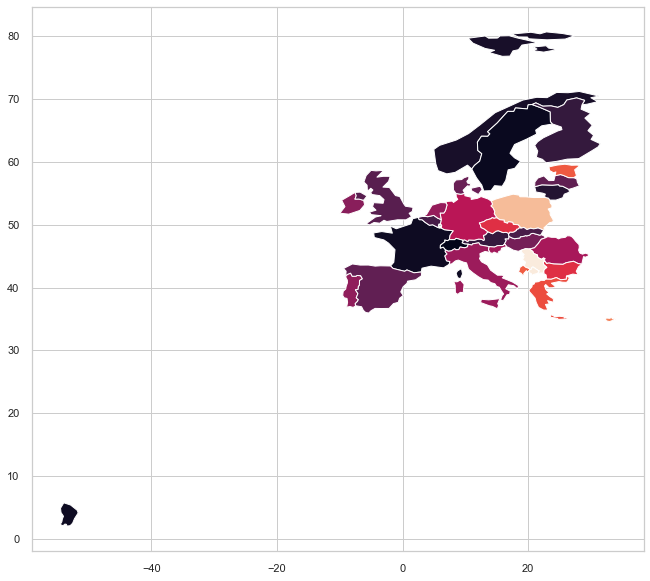

In [93]:
world.plot(column='CI')

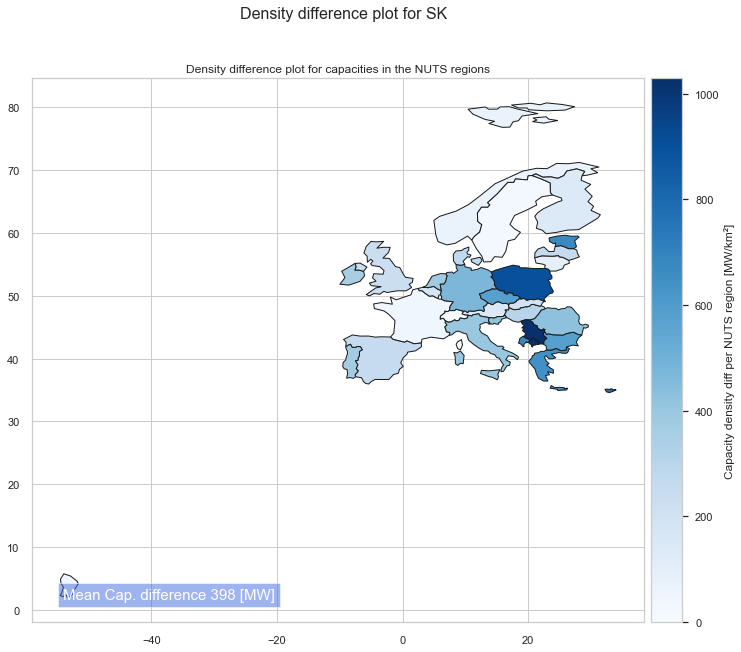

In [94]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1)

fig.suptitle("Density difference plot for " + country, fontsize=16)

divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size="5%", pad=0.1)

world.plot(column='CI',
           ax=ax,
           cax=cax,
           legend=True,
           legend_kwds={'label': "Capacity density diff per NUTS region [MW/km²]", 'orientation': "vertical"},
           cmap='Blues',
           edgecolor='k')


ax.text(0.05, 0.05,'Mean Cap. difference ' + str(round(world.CI.mean())) + ' [MW]',\
        ha='left', va='center', transform=ax.transAxes, fontsize=15, color='white',\
        bbox={'facecolor': 'royalblue', 'alpha': 0.5, 'pad': 5})

ax.title.set_text('Density difference plot for capacities in the NUTS regions')


# Export final CO2 signals

In [95]:
Carbon_intensitiy_entsoe_gen_type.to_csv(processed_directory_path + '/CI_bottom_up_methode.csv')
Carbon_intensitiy_entsoe_gen_type.to_csv(output_directory_path + '/CI_bottom_up_methode.csv')

# Plottting 

In [100]:
CI_compar.index

Index(['AT', 'BE', 'BG', 'CY', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FI', 'FR', 'HR',
       'HU', 'IE', 'IS', 'IT', 'LT', 'LU', 'LV', 'MT', 'NL', 'NO', 'PL', 'PT',
       'GB'],
      dtype='object')

Text(0.5, 0, 'Value of the variables')

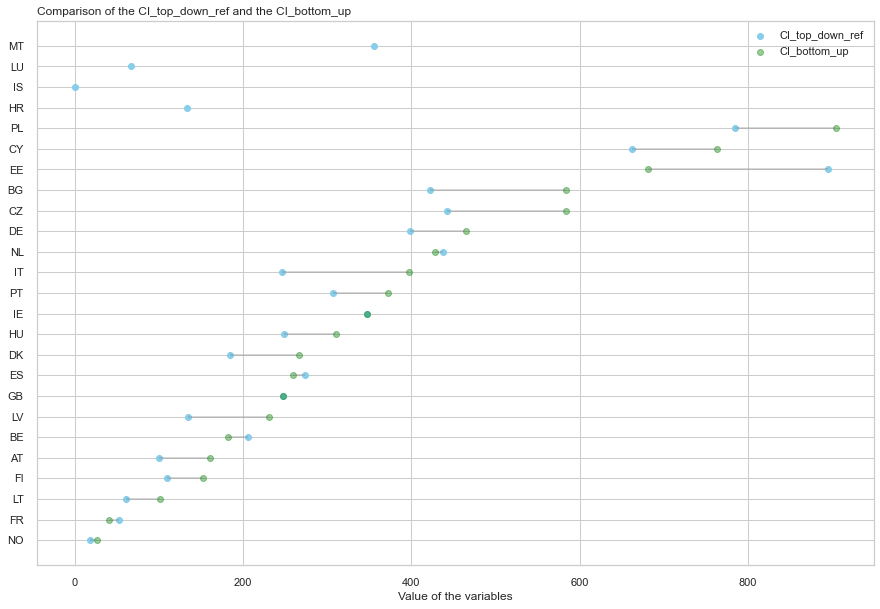

In [105]:
import numpy as np
# Create a dataframe
#value1=np.random.uniform(size=20)
#value2=value1+np.random.uniform(size=20)/4
#df = pd.DataFrame({'group':list(map(chr, range(65, 85))), 'value1':value1 , 'value2':value2 })

CI_compar

# Reorder it following the values of the first value:
ordered_df = CI_compar.sort_values(by='CI_bottom_up')
my_range=range(1,len(CI_compar.index)+1)
 
# The vertical plot is made using the hline function
# I load the seaborn library only to benefit the nice looking feature
import seaborn as sns
plt.hlines(y=my_range, xmin=ordered_df['CI_top_down_ref'], xmax=ordered_df['CI_bottom_up'], color='grey', alpha=0.4)
plt.scatter(ordered_df['CI_top_down_ref'], my_range, color='skyblue', alpha=1, label='CI_top_down_ref')
plt.scatter(ordered_df['CI_bottom_up'], my_range, color='green', alpha=0.4 , label='CI_bottom_up')
plt.legend()
 
# Add title and axis names
plt.yticks(my_range, ordered_df.index)
plt.title("Comparison of the CI_top_down_ref and the CI_bottom_up", loc='left')
plt.xlabel('Value of the variables')
#plt.ylabel(ordered_df.index)

In [97]:
df

,group,value1,value2
0,A,0.902867,1.008117
1,B,0.279368,0.408878
2,C,0.132359,0.310435
3,D,0.575145,0.710788
4,E,0.950089,1.165530
5,F,0.788957,0.861369
6,G,0.433962,0.436912
7,H,0.023518,0.062924
8,I,0.267056,0.489167
9,J,0.065969,0.182015
